<a href="https://colab.research.google.com/github/poojatanawade09/SimulationInML/blob/main/Simulation_In_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Simulation technique :  demonstration using Monte carlo method**

This notebook is to implement how montecarlo simulation can be implemented & used to find impact of input varaibles on uncertainity in target varaible


A Monte Carlo simulation is a statistical method that uses repeated random sampling to simulate and analyze the probability of different outcomes when a system or process has random variables.

### 💡 What are simulation techniques in ML?

Simulation techniques in machine learning involve using computational models to mimic real-world processes and generate synthetic data. They allow us to explore the behavior of systems under different conditions and estimate the probability of various outcomes when there's uncertainty involved.


###Why are they needed in ML?

Simulation techniques are needed in ML for various reasons:

*    Handling uncertainty: Many real-world problems have inherent uncertainty. Simulation helps to capture the variability of input data and see how it affects predictions.

*    Risk analysis: By simulating different scenarios, we can identify potential risks and assess the impact of different decisions. This is valuable in areas like finance and healthcare.

*    Predicting with uncertainty: Instead of just giving a single prediction, simulations let us get a range of possible outcomes and their likelihood. This provides more informed decision-making.
*    Estimating model confidence: Simulations can assess the confidence of our predictions by showing how predictions vary with input changes.

### 💡 Why Monte Carlo in ML?

Machine learning models often make predictions, but:

* They don’t always know how sure they are
* They need to estimate risks or probabilities

Monte Carlo Simulation helps by saying:

> "Let’s run the model many times with slightly different inputs or assumptions and see what usually happens."

---

### 🧠 Example 1: Predicting House Prices

Suppose your ML model predicts house prices.

You input:

* Square footage
* Number of rooms
* Location

But some values have **uncertainty** — like estimated income of the area, or future interest rates.

Using Monte Carlo Simulation:

* You randomly tweak uncertain inputs many times (say 10,000)
* Each time, the model gives a different price
* You get a **range of possible prices**, and a better sense of **risk or uncertainty**

You might find:

* 90% of predicted prices are between £250,000 and £280,000
* That helps in **decision-making**, not just using a single number

---

### 🧠 Example 2: Bayesian Neural Networks (BNNs)

BNNs don’t give just one answer. They give a **distribution** of answers.
Monte Carlo methods are used to:

* Sample from those distributions
* Estimate the **mean prediction** and the **confidence**

This is called **Monte Carlo Dropout** — a popular technique where:

* You run the same neural network multiple times with random dropout
* Then average the results to estimate uncertainty

---

### 🧠 Example 3: Model Evaluation – Cross Validation

Even in training/evaluation, Monte Carlo methods are used:

* Randomly split data many times
* Train and test models on each split
* Get a more **reliable estimate** of how well the model performs

This is a form of **Monte Carlo Cross Validation**

---

### 🔍 So In Summary, Monte Carlo in ML is used for:

| Use Case                    | Why It's Helpful                              |
| --------------------------- | --------------------------------------------- |
| Predicting with uncertainty | See a range, not just one outcome             |
| Estimating confidence       | Know how sure the model is                    |
| Risk analysis               | Evaluate worst-case and best-case predictions |
| Robust model evaluation     | Reduce bias from lucky/unlucky data splits    |


### This tells you:

How sensitive your model is to uncertain inputs.

Gives confidence intervals (like: "I'm 90% sure the price will be in this range").

Helps decision-making in risky or uncertain environments.


#### **📌 Problem:**

Demonstration of Simulation Using Monte Carlo: House Price Prediction

This example demonstrates the use of Monte Carlo simulation for house price prediction. A machine learning (ML) model is trained to predict house prices in a given area based on various input variables.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#import kagglehub
# Download latest version
#path = kagglehub.dataset_download("altavish/boston-housing-dataset")
#print("Path to dataset files:", path)
#ls -lrt /kaggle/input/boston-housing-dataset

**Importing dataset**

In [ ]:
dataframe=pd.read_csv('/content/drive/MyDrive/Dataset/Boston_house_price.csv')

print("shape of dataframe ",dataframe.shape)


shape of dataframe  (506, 14)


**Column description**

1. CRIM per capital crime rate by town

2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.

3. INDUS proportion of non-retail business acres per town

4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5. NOX nitric oxides concentration (parts per 10 million)

6. RM average number of rooms per dwelling

7. AGE proportion of owner-occupied units built prior to 1940

8. DIS weighted distances to five Boston employment centers

9. RAD index of accessibility to radial highways

10. TAX full-value property-tax rate per 10,000 USD

11. PTRATIO pupil-teacher ratio by town

12. Black 1000(Bk — 0.63)² where Bk is the proportion of blacks by town

13. LSTAT % lower status of the population

**separating target column & input features**

In [ ]:
input_features=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']

target_column=['PRICE']

X=dataframe[input_features]
y=dataframe[target_column]

In [ ]:
#drop rows where target column is null /missing
dataframe['PRICE'].isnull().sum()

np.int64(0)

**Dividing into train - test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Feature selection:**

1] using SelectKbest , having feature score above 100

2] checking for multicollinearity

In [ ]:
y = np.round(y_train['PRICE'])
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_train,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(input_features)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns

In [ ]:
#finding features with feature-score above 100
top_features=featureScores.loc[featureScores['Score']>100].sort_values(by='Score',ascending=False)

In [ ]:
#to find multicollinearity & dropping columns having correlation value of 0.90 & above
corr_matrix=X_train[list(top_features['Specs'])].corr().abs()
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop=[column for column in upper.columns if any(upper[column]>0.90)]
print("columns to drop ",to_drop)

columns to drop  ['RAD']


In [ ]:
#checking if column to drop has any significant correlation with target varaible or not:
X['RAD'].corr(y)

np.float64(-0.3806676680291132)

In [ ]:
#dropping the column :RAD's as correlation with target varaible is not significant but very high with other input varaible 'TAX'
X_train.drop(to_drop,axis=1,inplace=True)
X_test.drop(to_drop,axis=1,inplace=True)

In [ ]:
print("columns on which model will be trained ",list(X_train.columns))

columns on which model will be trained  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']


**Train the model : Using catboost**

In [ ]:
!pip install -q catboost # Install the catboost library
from catboost import CatBoostRegressor # Now you can import CatBoostRegressor

In [ ]:
cb=CatBoostRegressor()
cb.fit(X_train,y_train)

Learning rate set to 0.03451
0:	learn: 9.2057262	total: 3.5ms	remaining: 3.5s
1:	learn: 9.0047990	total: 7.11ms	remaining: 3.55s
2:	learn: 8.8510487	total: 14.6ms	remaining: 4.84s
3:	learn: 8.6985948	total: 18.1ms	remaining: 4.52s
4:	learn: 8.5124839	total: 25.9ms	remaining: 5.15s
5:	learn: 8.3552103	total: 33.1ms	remaining: 5.48s
6:	learn: 8.2021987	total: 41.4ms	remaining: 5.87s
7:	learn: 8.0297866	total: 45.6ms	remaining: 5.65s
8:	learn: 7.8787321	total: 54.1ms	remaining: 5.96s
9:	learn: 7.7292729	total: 57.6ms	remaining: 5.7s
10:	learn: 7.5764719	total: 76.7ms	remaining: 6.89s
11:	learn: 7.4281128	total: 89.3ms	remaining: 7.35s
12:	learn: 7.3015955	total: 95.4ms	remaining: 7.24s
13:	learn: 7.1798975	total: 112ms	remaining: 7.88s
14:	learn: 7.0415835	total: 132ms	remaining: 8.69s
15:	learn: 6.9236030	total: 141ms	remaining: 8.68s
16:	learn: 6.8012079	total: 150ms	remaining: 8.65s
17:	learn: 6.6873692	total: 156ms	remaining: 8.5s
18:	learn: 6.5769557	total: 163ms	remaining: 8.4s
19:	

**checking  testing accuracy**

In [ ]:
print("testing accuracy :",cb.score(X_test,y_test))


testing accuracy : 0.8856797583755225


**Finding Top 5 best predictions made**

In [ ]:
predictions = cb.predict(X_test)
errors = y_test['PRICE'].values - predictions
error_df = pd.DataFrame({'Actual': y_test['PRICE'].values,
                        'Predicted': predictions,
                        'Error': errors})
#Calculate absolute errors:
error_df['Absolute Error'] = abs(error_df['Error'])

error_df.sort_values(by='Absolute Error', ascending=True).head(5)

,Actual,Predicted,Error,Absolute Error
62,31.5,31.471367,0.028633,0.028633
31,23.8,23.770243,0.029757,0.029757
110,8.7,8.661580,0.038420,0.038420
153,21.2,21.160811,0.039189,0.039189
65,20.0,19.911629,0.088371,0.088371


**get_feature_importance()** This method of the CatBoostRegressor object returns an array of feature importance values, one for each feature in your training data (X_train).

In [ ]:
# Access feature importance values directly
feature_importances = cb.feature_importances_

# Create a DataFrame for easier viewing
feature_importance_df = pd.DataFrame({'Feature': X_train.columns,
                                       'Importance': feature_importances})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

    Feature  Importance
11    LSTAT   31.655054
5        RM   28.873028
4       NOX    6.403161
7       DIS    5.961917
0      CRIM    5.839707
9   PTRATIO    4.467324
10        B    3.867940
6       AGE    3.685382
8       TAX    3.212793
2     INDUS    2.811960
3      CHAS    2.279116
1        ZN    0.942619


In [ ]:
dataframe.loc[:,['LSTAT','NOX','RM','PRICE']].corr()['PRICE']

,PRICE
LSTAT,-0.737663
NOX,-0.427321
RM,0.695360
PRICE,1.000000


##**Monte carlo simulation in python : checking uncertainity in predicted output with one varaible**

Step 1 :Simulate uncertainity in one input :**LSTAT varriable**

From dataset documentation in Table IV of Harrison & Rubin (1978), LSTAT is defined as:

Proportion of population that is lower status means proportion of adults without, some high school education and proportion of male workers classified as laborers.

**🧠 The Setup**

You're analyzing how LSTAT (percentage of lower-income population) affects predicted house price.

*   Original LSTAT value (ground truth for observation) = 3.76

*   Original model prediction = 31.67

*   Correlation between LSTAT and price = -0.73 (strong negative)


You will now run  Monte Carlo simulation where:

*    You will  randomly generated 1000 LSTAT values between 3.72 and 15

*    You kept other variables fixed

*    You will predict price for each sample



In [ ]:
X_test.iloc[62]['LSTAT']# finding LSTAT value for prediction number 62

np.float64(3.76)

**I want to apply Monte calo simulation to model uncertainity in LSTAT  variable**, currently valued at 3.76, lets suppose this population likely  increases to 15 % in area

In simulation terms, we will treat LSTAT as random varaible around 3.76 with small range of varaition.  It can vary + 12 unites , it could be between 3.72 and 15


**Next choose Distribution for simulation**

Option A : Uniform distribution , if every value between 3.72 and 15 is equally likely

Option B : Normal distribution, if values near 3.72 are more likely

 **We are using uniform  distribution**



Step 2 : Create baseline input for predictions

In [ ]:
#selecting best predicted output for this as base
X_test_base=X_test.iloc[62].copy()
y_test_base=y_test.iloc[62].copy()

Step 3 : Set Monte carlo simulations for TAX vaiable

-> select simulation frequency

-> select mean value

->select std deviation

In [ ]:
X_test_base['LSTAT']

np.float64(3.76)

In [ ]:
simulations =1000
LSTAT_samples=np.random.uniform(3.76,15,size=simulations)

step 4 : predict results for every simulated value in input_samples varaible

In [ ]:
predicted_prices_lstat=[]
for i in LSTAT_samples:
  X_test_base['LSTAT']=i
  predicted_prices_lstat.append(cb.predict(X_test_base.values.reshape(1,-1))[0])

step 5: Analyse the output

In [ ]:
#check for mean value
np.array(predicted_prices_lstat).mean()

np.float64(27.252746812520957)

##🎯 Why Percentiles?

**We want to know:**

“What price range covers most of the possibilities — say, 90% of them?”

This is what percentiles help us find:



**🎯 What Do 5th and 95th Percentile Mean?**
Think of your 1000 predictions as sorted from lowest to highest:
[ 25.2, 25.3, ..., 25.92, ..., 31.0, 31.2, ..., 31.5 ]

The 5th percentile means:
→ “What is the price below which the lowest 5% of predictions fall?”

In your case: 5th percentile = 25.92
→ That means: 50 out of 1000 predicted prices are less than or equal to 25.92.

The 95th percentile = 31.5
→ That means: 950 out of 1000 predicted prices are less than or equal to 31.5.



 **🔍 So When I Say:**

"In the worst 5% of cases, the price could drop to 25.92"

It means:
When LSTAT is randomly sampled between 3.72 and 15 And you predict price for each sample ,The bottom 5% of all predicted prices were 25.92 or lower

You can think of it like:

"If I draw 1000 possible futures where LSTAT varies, the worst 50 of them (bottom 5%) have price around 25.92 or less."



**🧠 Why This Matters?**

It helps answer:

“How bad can it get if my input (LSTAT) is uncertain or fluctuates?”

“What’s the risk or range of outcomes I might expect?”







In [ ]:
fifth_percentile = np.percentile(predicted_prices_lstat, 5)
print(f"5th Percentile of Predicted Prices: {fifth_percentile}")

ninty_fifth_percentile = np.percentile(predicted_prices_lstat, 95)
print(f"95th Percentile of Predicted Prices: {ninty_fifth_percentile}")

prediction_range = ninty_fifth_percentile - fifth_percentile

print(f"Range covering 90% of predictions: {prediction_range}")

print(f"90% confidence range : ${fifth_percentile:,.2f} to ${ninty_fifth_percentile:,.2f}")

5th Percentile of Predicted Prices: 25.300746618061762
95th Percentile of Predicted Prices: 30.612304213416543
Range covering 90% of predictions: 5.311557595354781
90% confidence range : $25.30 to $30.61


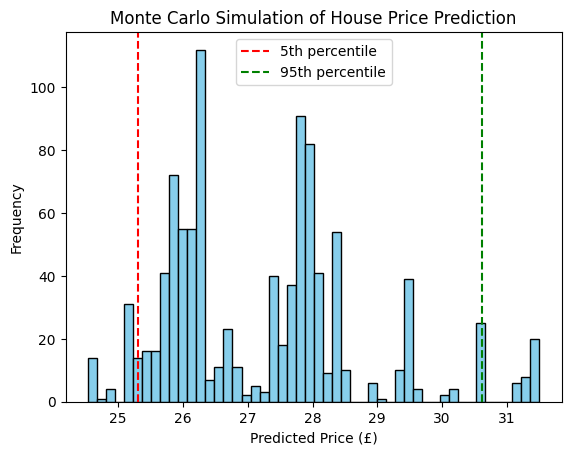

In [ ]:
plt.hist(predicted_prices_lstat, bins=50, color='skyblue', edgecolor='black')
plt.title("Monte Carlo Simulation of House Price Prediction")
plt.xlabel("Predicted Price (£)")
plt.ylabel("Frequency")
plt.axvline(np.percentile(predicted_prices_lstat, 5), color='red', linestyle='dashed', label='5th percentile')
plt.axvline(np.percentile(predicted_prices_lstat, 95), color='green', linestyle='dashed', label='95th percentile')
plt.legend()
plt.show()

**✋ In Short:**

We use percentiles to get a confidence range (e.g. 90% of predictions fall between X and Y)

We use a histogram to visualize the shape of that prediction distribution

**You simulated the impact of  change in LSTAT values , keeping other things constant.**

###**You observed:**


5th percentile of predicted prices = 25.30

95th percentile = 30.61


**“What if LSTAT varies from current (3.72) up to 15 (i.e. the house is in a more lower-income area)?”**

**📊 What does analysis says**
1. LSTAT is a sensitive feature
Because LSTAT has a strong negative correlation (-0.73), increasing it causes price to drop.


2. Your Model Is Responding As Expected


At LSTAT = 3.72, model predicted 30.61

As LSTAT increases to values closer to 15, Price decreases due to the strong negative correlation

In fact, the worst-case simulated price (5th percentile) is 25.30

🔍 So:

"If the neighborhood LSTAT varies (up to 15%), the price could drop from 31.67 to as low as ~25 in the worst 5% of cases."


## ✅ Interpretation

“Given uncertainty in LSTAT (within a realistic range), how much might the predicted price change?”

Your output tells you:
Most of the time (90% between 5th–95th percentiles), predicted price is between 25.3 and 31.6

There's a high sensitivity to LSTAT

A small change in LSTAT (even staying below 15) can cause the model to predict a much lower price

##**Monte carlo simulation in python : checking uncertainity in predicted output with multiple varaible**

**We have checked for 'LSTAT' , now lets check for 'NOx & RM'**

Datset has **NOx.**

Nitric oxides (NOx) are pollutants produced during combustion, often from vehicles and industrial processes.
Higher NOx levels contribute to smog, acid rain, and respiratory problems.

Lets suppose , Area and its neighbourhood will see rapid industrialisation in coming months which will lead to increase in values of NOx

In [ ]:
simulations =1000
NOx_samples=np.random.uniform(0.55,0.80,size=simulations)

In [ ]:
#selecting best predicted output for this as base
X_test_base=X_test.iloc[62].copy()
y_test_base=y_test.iloc[62].copy()

predicted_prices_nox=[]
for i in NOx_samples:
  X_test_base['NOX']=i
  predicted_prices_nox.append(cb.predict(X_test_base.values.reshape(1,-1))[0])

In [ ]:
fifth_percentile = np.percentile(predicted_prices_nox, 5)
print(f"5th Percentile of Predicted Prices: {fifth_percentile}")

ninty_fifth_percentile = np.percentile(predicted_prices_nox, 95)
print(f"95th Percentile of Predicted Prices: {ninty_fifth_percentile}")

prediction_range = ninty_fifth_percentile - fifth_percentile

print(f"Range covering 90% of predictions: {prediction_range}")

print(f"90% confidence range : ${fifth_percentile:,.2f} to ${ninty_fifth_percentile:,.2f}")

5th Percentile of Predicted Prices: 30.78732101277656
95th Percentile of Predicted Prices: 31.941184989008356
Range covering 90% of predictions: 1.153863976231797
90% confidence range : $30.79 to $31.94


Dataset has **RM**: number of rooms per dwelling

Lets suppose user wants to check if prices differs if number of rooms increase / descrease by 2
At present number of rooms is 6
so possible values are 4,5,7,8

In [ ]:
#selecting best predicted output for this as base
X_test_base=X_test.iloc[62].copy()
y_test_base=y_test.iloc[62].copy()
predicted_prices_rm=[]
simulations=1000
possibe_rm_values=np.random.uniform(4,8,size=simulations)
for i in possibe_rm_values:
  X_test_base['RM']=i
  predicted_prices_rm.append(cb.predict(X_test_base.values.reshape(1,-1))[0])

In [ ]:
fifth_percentile = np.percentile(predicted_prices_rm, 5)
print(f"5th Percentile of Predicted Prices: {fifth_percentile}")

ninty_fifth_percentile = np.percentile(predicted_prices_rm, 95)
print(f"95th Percentile of Predicted Prices: {ninty_fifth_percentile}")

prediction_range = ninty_fifth_percentile - fifth_percentile

print(f"Range covering 90% of predictions: {prediction_range}")

print(f"90% confidence range : ${fifth_percentile:,.2f} to ${ninty_fifth_percentile:,.2f}")

5th Percentile of Predicted Prices: 26.078632523965503
95th Percentile of Predicted Prices: 45.91003064810014
Range covering 90% of predictions: 19.831398124134637
90% confidence range : $26.08 to $45.91


##**Checking which varaible has most impact?**

1] compare standard deviations

The one with larger standard deviation casuses more output variability, therefore has more impact under uncertainity

In [ ]:
np.std(predicted_prices_lstat),np.std(predicted_prices_nox),np.std(predicted_prices_rm)

(np.float64(1.5222972208591707),
 np.float64(0.44896836870940565),
 np.float64(6.86109424531544))

2] Calculate Partial correlation

Variable which has highest correlation with target variable, more it influences price uncertainity

In [ ]:
#get index of features
simulations=1000
rm_index=list(X_test_base.index).index('RM') # Use X_test_base.index to get correct indices
Lstat_index=list(X_test_base.index).index('LSTAT')  # Use X_test_base.index to get correct indices
NOX_index=list(X_test_base.index).index('NOX')  # Use X_test_base.index to get correct indices

#generated simulation samples for all three features
#{'LSTAT':LSTAT_samples,'NOX':NOx_samples,'RM':possibe_rm_values}

#create base input matrix with original obs repeated
X_simulated=np.tile(X_test_base.values,(simulations,1))

#overwrite 3 feature columns with sample values
X_simulated[:,Lstat_index]=LSTAT_samples
X_simulated[:,NOX_index]=NOx_samples
X_simulated[:,rm_index]=possibe_rm_values

In [ ]:
#make predictions
predicted_prices_simulated=cb.predict(X_simulated)

#create DF for analysis
df_sim=pd.DataFrame({'LSTAT':LSTAT_samples,'NOX':NOx_samples,'RM':possibe_rm_values,'PRICE':predicted_prices_simulated})
df_sim.corr()['PRICE']

,PRICE
LSTAT,-0.336786
NOX,0.001700
RM,0.828351
PRICE,1.000000


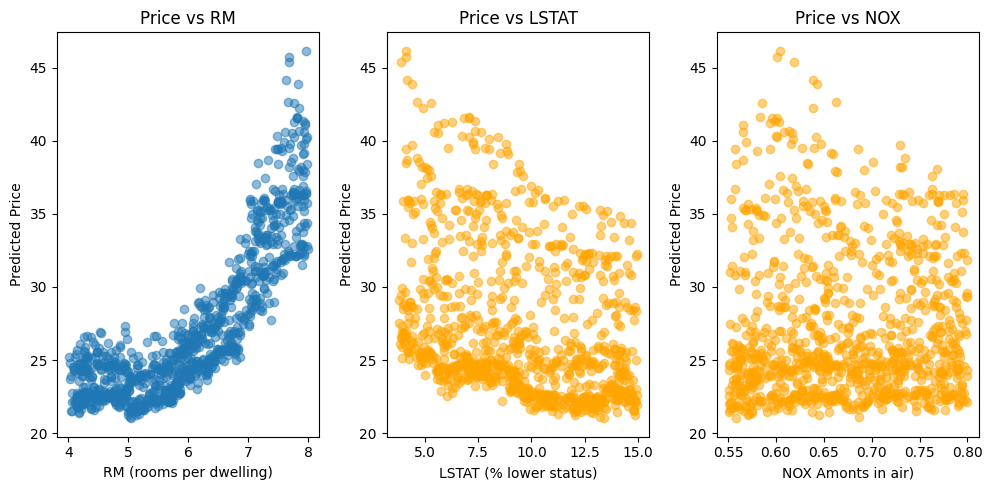

In [ ]:
# Optional: Visualize
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_sim['RM'], df_sim['PRICE'], alpha=0.5)
plt.title("Price vs RM")
plt.xlabel("RM (rooms per dwelling)")
plt.ylabel("Predicted Price")

plt.subplot(1, 3, 2)
plt.scatter(df_sim['LSTAT'], df_sim['PRICE'], alpha=0.5, color='orange')
plt.title("Price vs LSTAT")
plt.xlabel("LSTAT (% lower status)")
plt.ylabel("Predicted Price")

plt.subplot(1, 3, 3)
plt.scatter(df_sim['NOX'], df_sim['PRICE'], alpha=0.5, color='orange')
plt.title("Price vs NOX")
plt.xlabel("NOX Amonts in air)")
plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()

As clearly seen from standard deviation , correlation plots above and independant monte carlo simulation analysis of all 3 varaibles,
**'RM' varaible has highest impact .**  

##**✅Conclusion**

We applied Monte Carlo simulation to explore how uncertainty in key input features (`RM`, `LSTAT`, and `NOX`) affects predicted house prices from a trained regression model. By varying each feature across realistic ranges while holding others constant, we generated thousand of hypothetical scenarios.

Key observations:

* **LSTAT** (lower-status population %) showed a **strong negative impact** on price. As LSTAT increases, predicted price decreases sharply — consistent with the original correlation of -0.73.

* **RM** (average number of rooms) exhibited a **positive relationship** with price. Higher room count led to significantly higher predicted values.

* **NOX** (nitric oxides concentration (parts per 10 million)) had **less consistent impact** and little  influence on price volatility compared to other two varaibles.

Through this simulation, we quantified prediction **uncertainty**:

This approach helped:

* Identify which features **drive most variability** in predictions.
* Understand **sensitivity** of predictions to changes in real-world inputs.
* Communicate model **reliability and risk** in decision-making (e.g., pricing strategy, risk modeling).